<a href="https://colab.research.google.com/github/lukmanAji135/Colab/blob/main/UTS2_G211210023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import copy
#%matplotlib inline

In [16]:
#Read data into dataframe
X=pd.read_csv('/content/CarPrice_Assignment.csv')
Y=X.price #Target Variable
X=X.drop(['price'],axis=1) #Input data

In [17]:
#Checking for null values or Datapreprocessing
print('Null values in X',X.isnull().sum())
print('Null values in Y',Y.isnull().sum())
#No null values

Null values in X car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64
Null values in Y 0


In [18]:
#Checking if scale and encoding is required
#print(X.head())
#print(Y.head())

In [19]:
#Understanding the dataset
print('Shape is',X.shape)
print('Head is',X.head())
print('Describing dataframe ',X.describe(include='all'))

Shape is (205, 25)
Head is    car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight engi

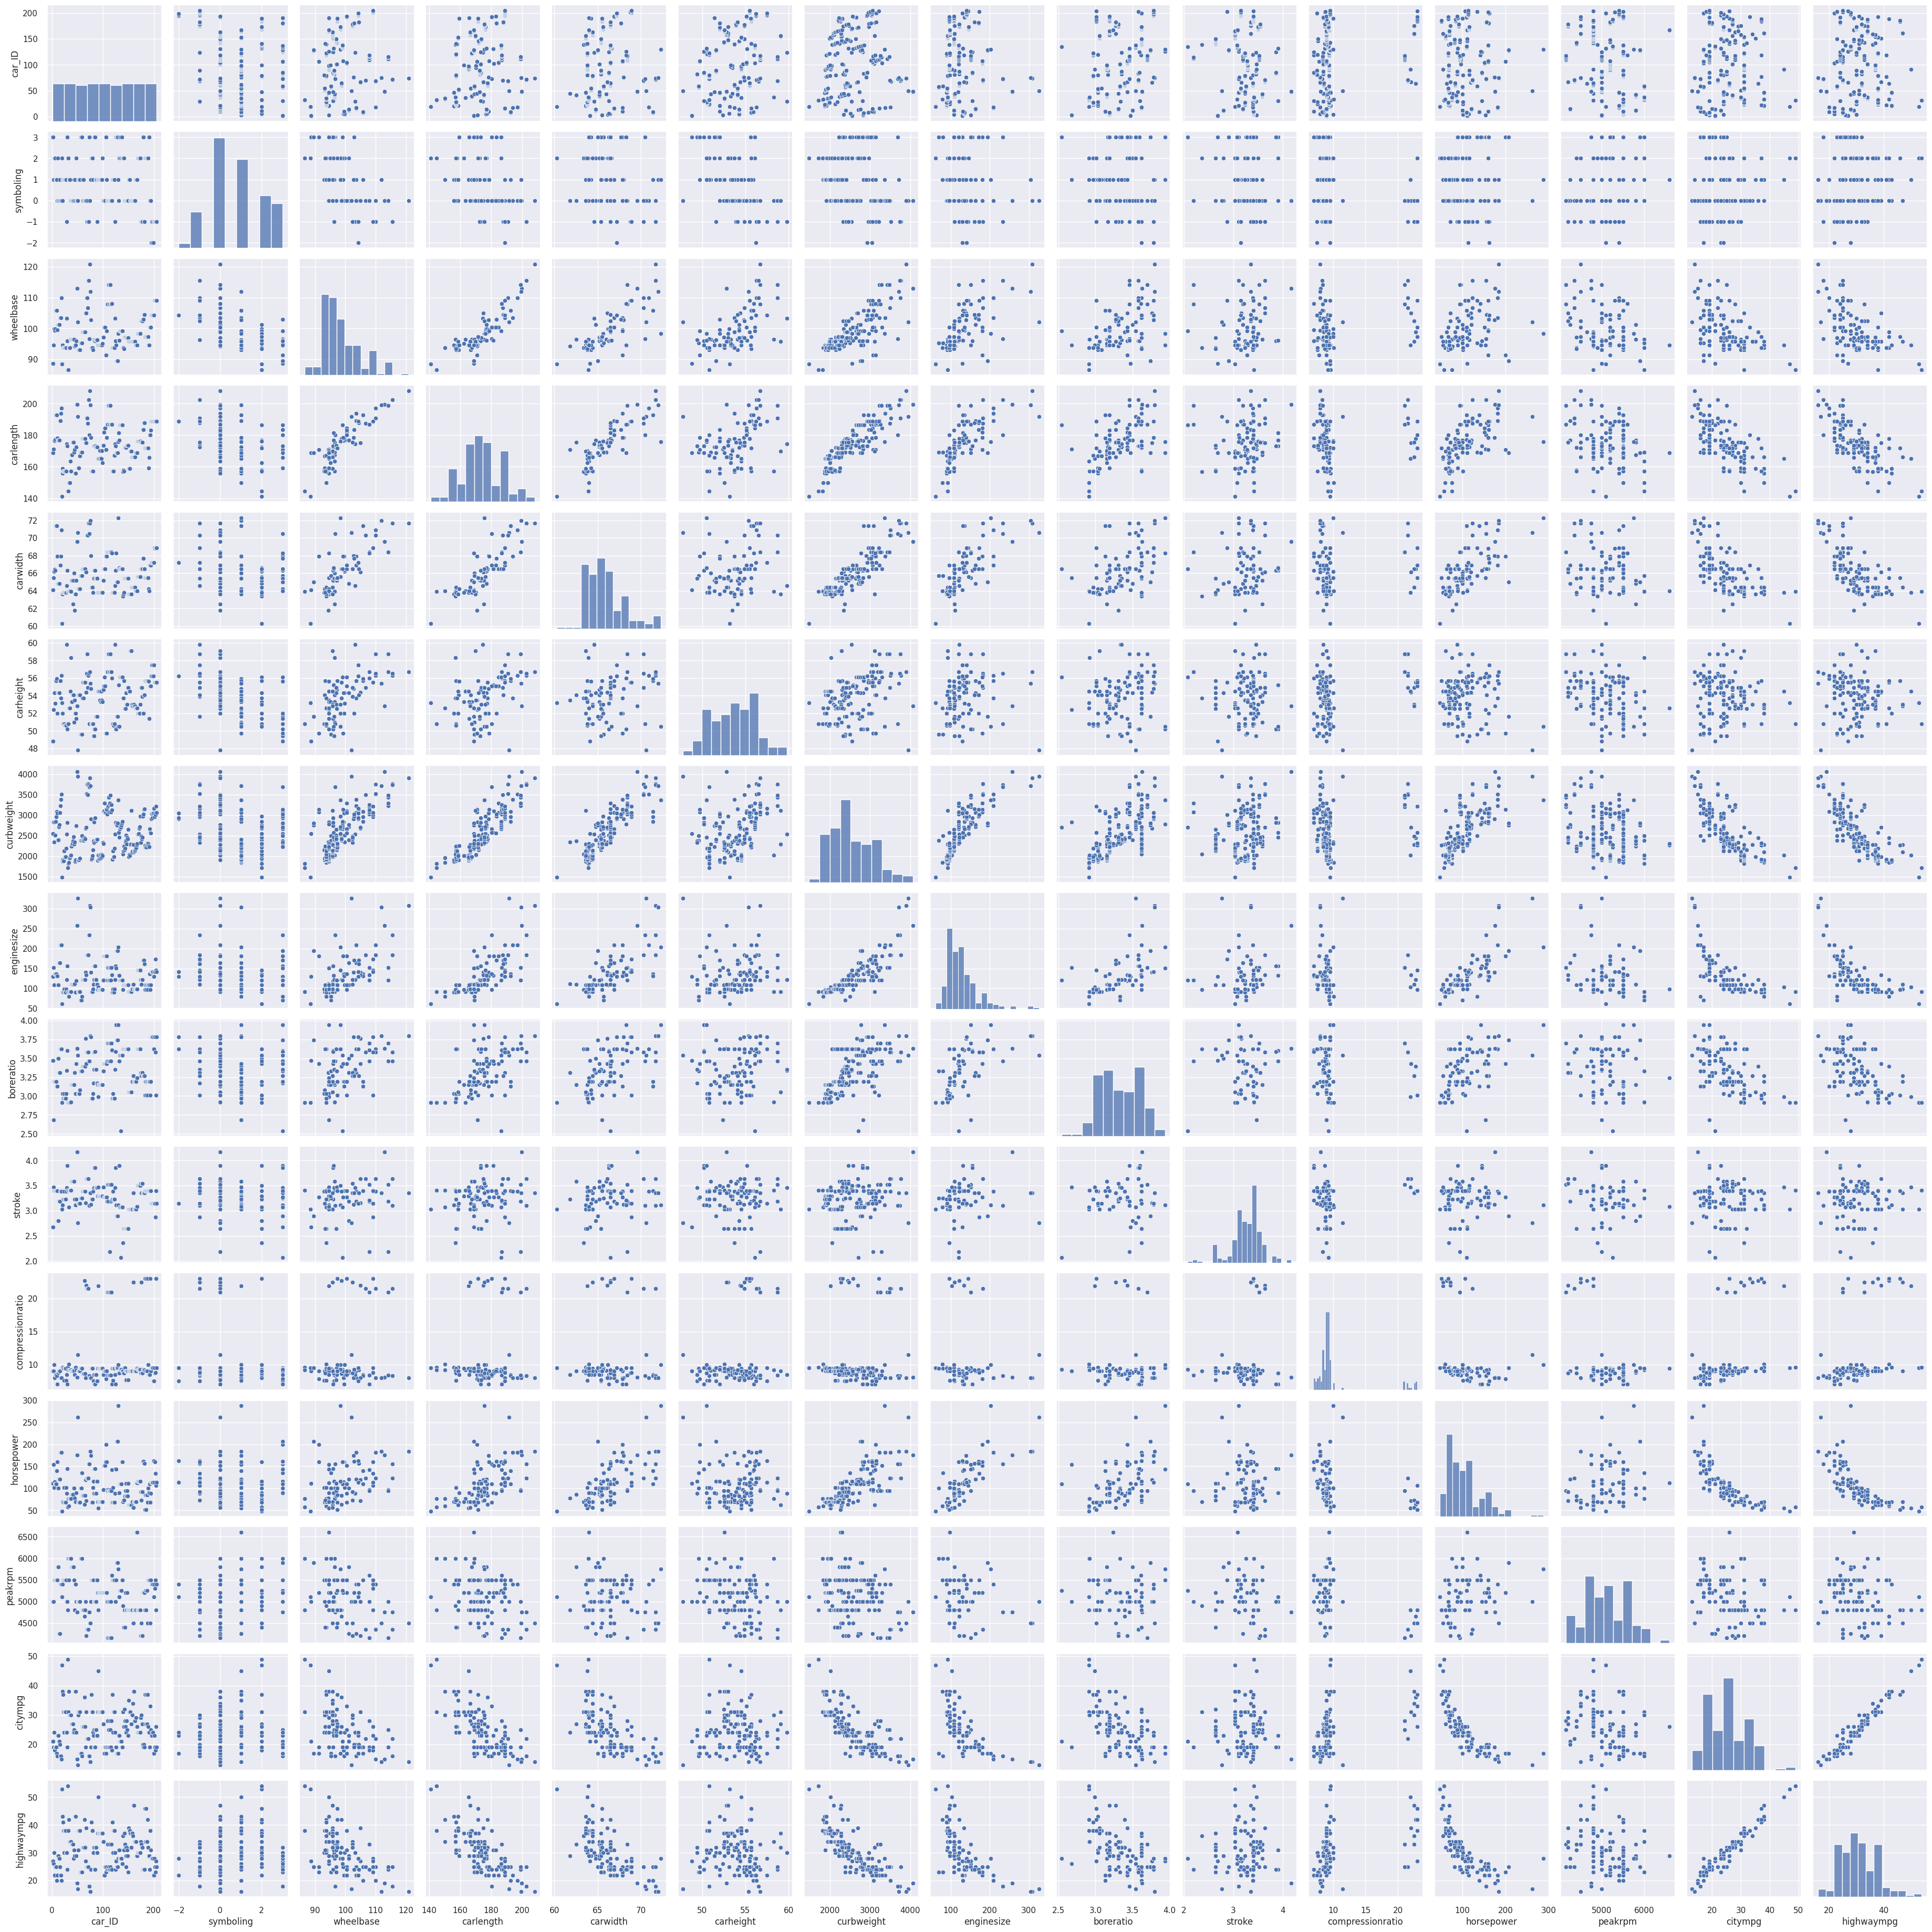

In [20]:
#Plot all relationship between dataset X using Pairplot
plt.rcParams["figure.figsize"] = [16,9]
sns.set(style="darkgrid")
sns.pairplot(data=X)

In [21]:
#X.hist('horsepower')
#X.boxplot('horsepower')
#X.groupby('horsepower').hist()

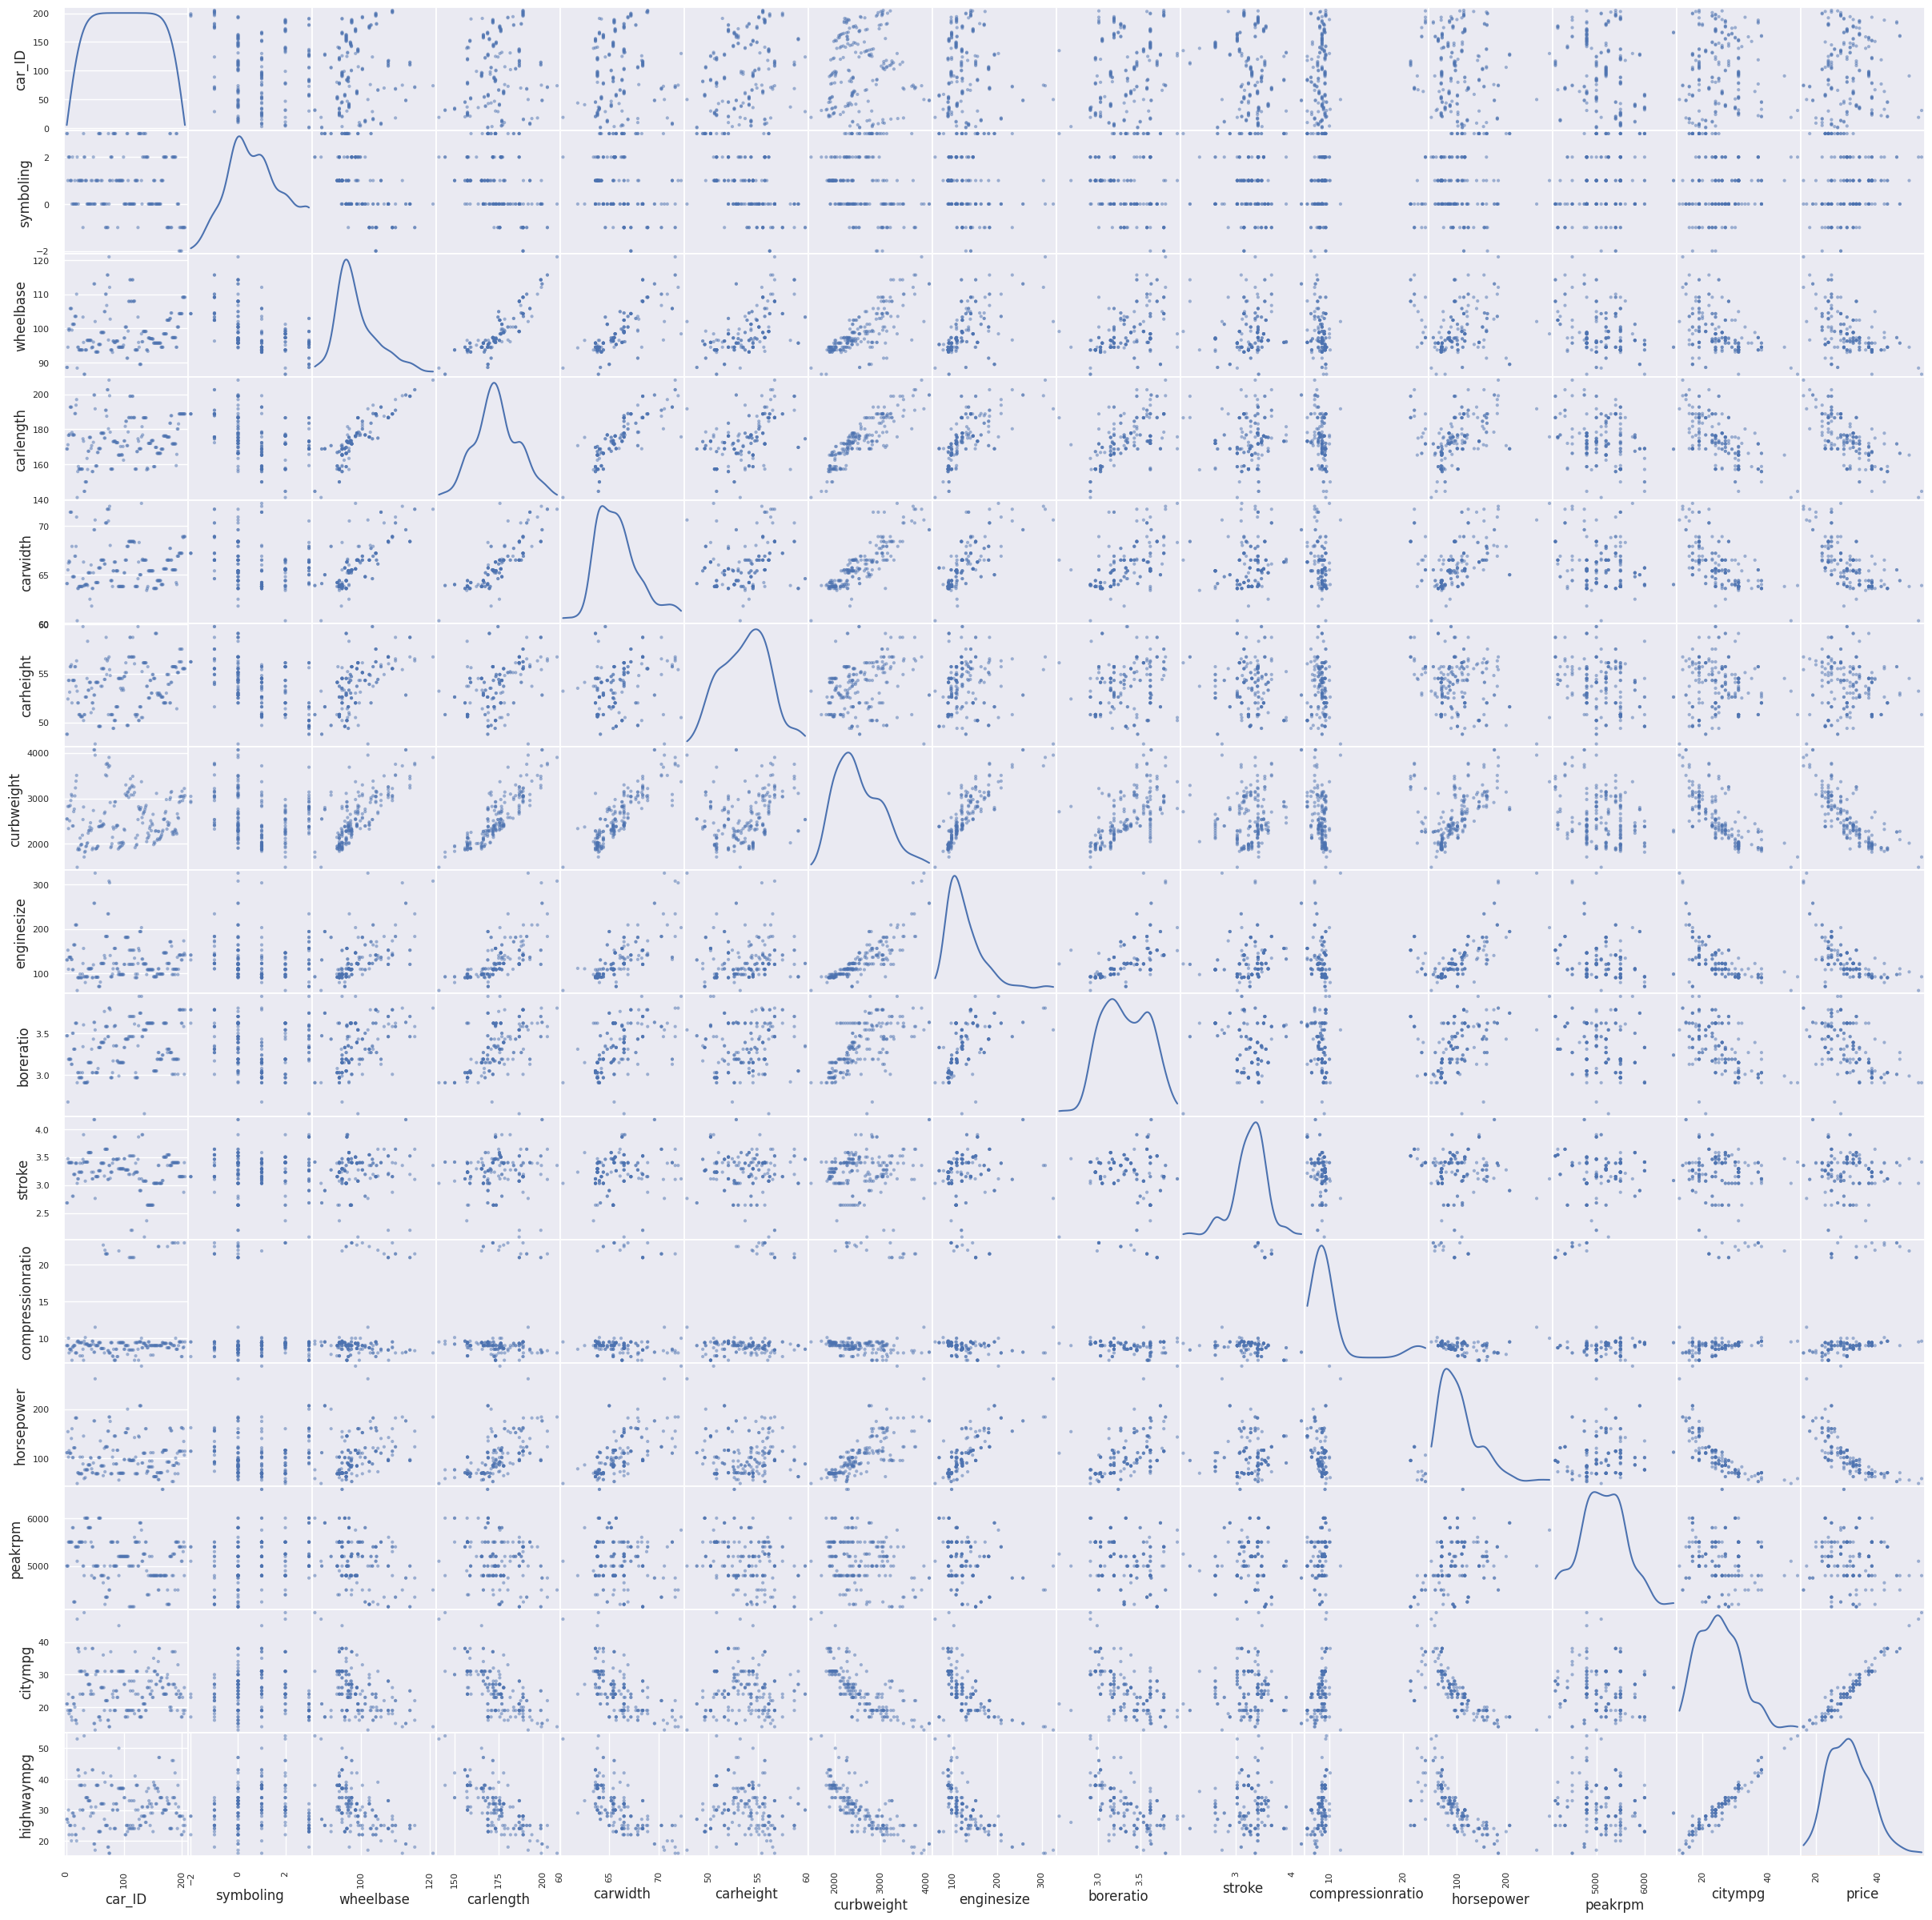

In [22]:
scatter_matrix(X, alpha=0.5, figsize=(30,30), diagonal='kde',grid='true')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Y, bins=30)
plt.show()

<Axes: >

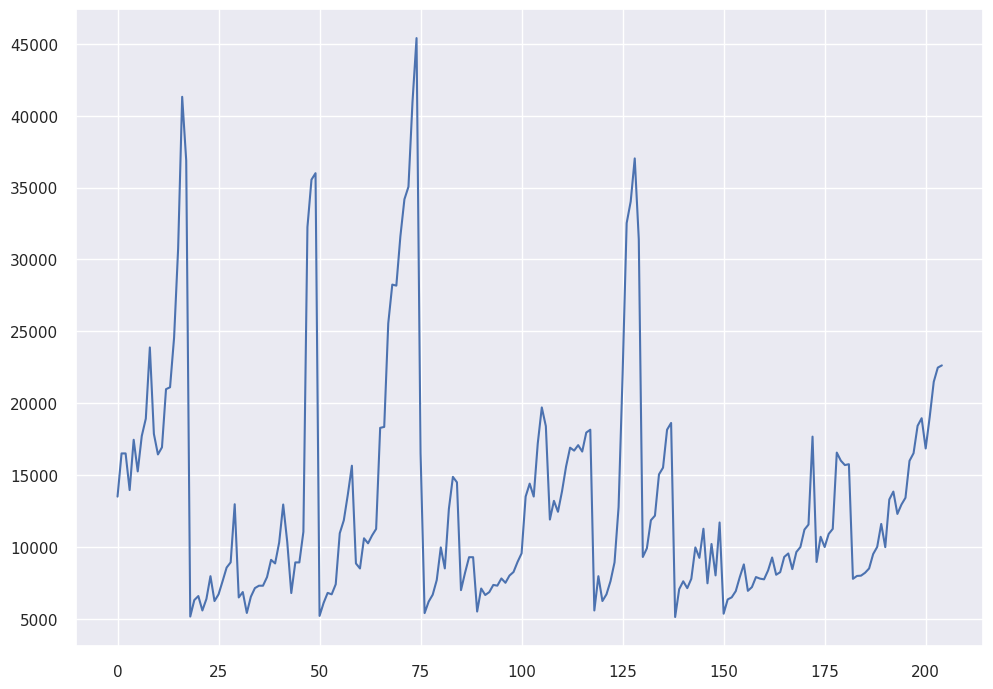

In [23]:
#Plot Y in timeseries data
Y.plot()

<Axes: >

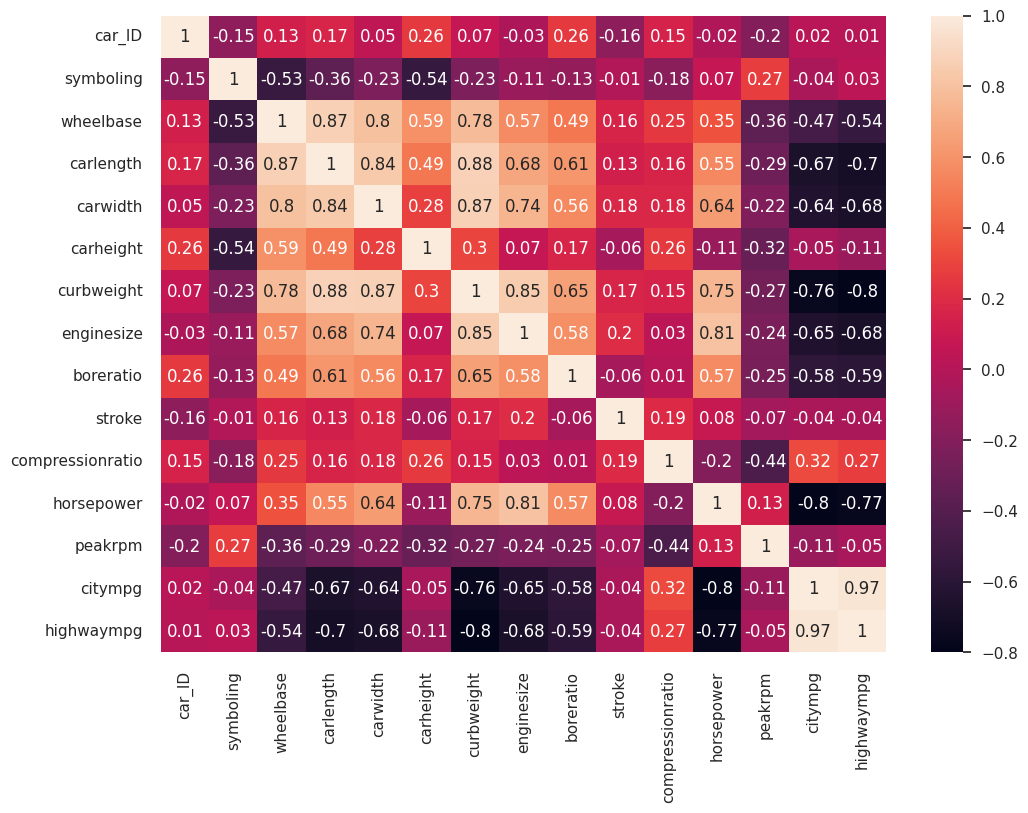

In [24]:
#displot - Heat map and correlation matrix
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [25]:
#Encoding is required

In [27]:
#print(X['doornumber'].value_counts())
cleanup_nums = {"doornumber":     {"four": 4, "two": 2},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
X.replace(cleanup_nums, inplace=True)

In [28]:
#Copying all categorical data into another dataframe using copy
Cat=X.select_dtypes(include=['object']).copy(deep='False')

In [29]:
#Transposing or resizing Cat df
Cat=Cat.iloc[:, :].apply(pd.Series)
Name=Cat.CarName.copy()

In [30]:
#Splitting all values of CarName
Temp=[]
Temp=Name.str.split(pat=" ",expand=True)
Temp=Temp[0]
X.CarName=Temp
Cat.CarName=Temp

In [31]:
#Replacing bad spellings with right spellings
cleanup_nums = {"CarName":     { "alfa-romero giulia": "alfa-romero stelvio" , "audi 100ls": "audi 100ls" , "audi 5000":"audi 4000" , "bmw 320i":"bmw x1", "bmw x1" : "bmw z4","bmw x4" : "bmw x5"} }
X.replace(cleanup_nums, inplace=True)

In [32]:
#OneHotEncoding using dummy method
L=X.copy(deep='False')
L=pd.get_dummies(L, columns=Cat.columns)

In [33]:
#Scaling is required

In [34]:
Xs = scale(L)

In [35]:
#Splitting data into test and train - 30% Test
X_train, X_test, Y_train, Y_test = train_test_split(Xs, Y, test_size=0.3, random_state=42)

In [36]:
#Finding correlation coeff
Coef=LinearRegression()

In [37]:
Coef.fit(X_train, Y_train)
Y_pred = Coef.predict(X_test)

In [38]:
# The coefficients
print('Coefficients: \n', Coef.coef_)

Coefficients: 
 [ 7.59451250e+03 -1.11774996e+02  1.69671847e+02  1.27433103e+02
 -7.84086001e+02  1.25712785e+03 -9.57326955e+01  2.43709462e+03
 -7.38230470e+02  3.79902209e+03 -9.20315459e+02 -1.80850024e+02
 -1.05860339e+02  6.54485148e+01  8.32089521e+02  1.11111720e+03
 -5.18136376e+02  1.21935017e+14  2.10159812e+14  3.17830063e+14
  3.38915526e+14  3.38915526e+14  2.10159812e+14  3.58560668e+14
  4.26516315e+14  2.42070230e+14  2.10159812e+14  1.72018983e+14
  4.55759561e+14  1.21935017e+14  4.26516315e+14  4.82632700e+14
  8.63759712e+13  3.17830063e+14  1.21935017e+14  2.42070230e+14
  1.72018983e+14  2.94995589e+14  1.23416100e+14  6.27001860e+14
  1.21935017e+14 -2.58136075e+13  3.58560668e+14  3.94376080e+14
  1.72018983e+14 -1.19753336e+14  1.56404658e+14 -3.21698189e+14
 -3.21698189e+14  4.68101813e+13  5.37794389e+13  1.31690384e+14
  1.38575682e+14  9.08749985e+13 -1.14678624e+14 -2.75761269e+14
 -2.70355267e+14  9.68242240e+13 -5.02051419e+13 -7.05789771e+14
 -2.09469

In [39]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))

Mean squared error: 139480318693677282951281246208.00


In [41]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Variance score: -2013156810949216698368.00
